In [37]:
# Import smtplib for the actual sending function
# import smtplib
# import getpass

import imaplib
import email
import getpass
import pandas as pd

In [38]:
# username = input("Enter your remote account: ")
username='SunnySingh.Nespl@gmail.com'
password = getpass.getpass()

··········


In [39]:
#https://myaccount.google.com/lesssecureapps
# 2) Gmail Settings -> Forwarding and POP / IMAP -> IMAP Acess to Enable IMAP
#https://mail.google.com/mail/u/0/#settings/fwdandpop

mail = imaplib.IMAP4_SSL('imap.gmail.com')
mail.login(username, password)

('OK', [b'sunnysingh.nespl@gmail.com authenticated (Success)'])

In [40]:
print(mail.list())

('OK', [b'(\\HasNoChildren) "/" "INBOX"', b'(\\HasChildren \\Noselect) "/" "[Gmail]"', b'(\\All \\HasNoChildren) "/" "[Gmail]/All Mail"', b'(\\HasNoChildren \\Trash) "/" "[Gmail]/Bin"', b'(\\Drafts \\HasNoChildren) "/" "[Gmail]/Drafts"', b'(\\HasNoChildren \\Important) "/" "[Gmail]/Important"', b'(\\HasNoChildren \\Sent) "/" "[Gmail]/Sent Mail"', b'(\\HasNoChildren \\Junk) "/" "[Gmail]/Spam"', b'(\\Flagged \\HasNoChildren) "/" "[Gmail]/Starred"'])


In [41]:
mail.select("inbox")

('OK', [b'3'])

In [42]:
result, numbers = mail.uid('search', None, "ALL")
uids = numbers[0].split()
uids = [id.decode("utf-8") for id in uids ]
uids = uids[-1:-101:-1]
result, messages = mail.uid('fetch', ','.join(uids), '(BODY[HEADER.FIELDS (SUBJECT FROM DATE)])')


In [43]:
date_list = []
from_list = [] 
subject_text = []
for i, message in messages[::2]:
    msg = email.message_from_bytes(message)
    decode = email.header.decode_header(msg['Subject'])[0]
    if isinstance(decode[0],bytes):
        decoded = decode[0].decode()
        subject_text.append(decoded)
    else:
        subject_text.append(decode[0])
    date_list.append(msg.get('date'))
    fromlist = msg.get('From')
    fromlist = fromlist.split("<")[0].replace('"', '')
    from_list.append(fromlist)
date_list = pd.to_datetime(date_list)
date_list1 = []
for item in date_list:
    date_list1.append(item.isoformat(' ')[:-6])
print(len(subject_text))
print(len(from_list))
print(len(date_list1))
df = pd.DataFrame(data={'Date':date_list1, 'Sender':from_list, 'Subject':subject_text})
print(df.head())
df.to_csv('inbox_email.csv',index=False)


3
3
3
                  Date  ...                                           Subject
0  2021-03-28 01:47:19  ...  Sunny, finish setting up your new Google Account
1  2021-03-28 11:21:05  ...                           Critical security alert
2  2021-03-28 11:21:58  ...                           Critical security alert

[3 rows x 3 columns]


# Analysis



In [49]:
emails=pd.read_csv("inbox_email.csv")
emails.head()

,Date,Sender,Subject
0,2021-03-28 01:47:19,Google Community Team,"Sunny, finish setting up your new Google Account"
1,2021-03-28 11:21:05,Google,Critical security alert
2,2021-03-28 11:21:58,Google,Critical security alert


In [59]:
# emails.describe()

In [60]:
from datetime import datetime
emails['Time'] = emails['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%H:%M:%S'))
emails['SinceMid'] = emails['Time'].apply(lambda x: (datetime.strptime(x, FMT) - datetime.strptime("00:00:00", FMT)).seconds) / 60 / 60

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

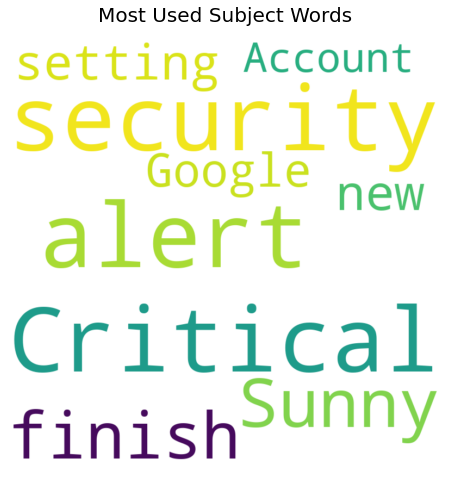

In [62]:
# Create a list of words
text = ""
for item in emails["Subject"]:
    if isinstance(item,str):
        text += " " + item
    text.replace("'", "")
    text.replace(",","")
    text.replace('"','')


# Create the wordcloud object
wordcloud = WordCloud(width=800, height=800, background_color="white")

# Display the generated image:
wordcloud.generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Most Used Subject Words", fontsize=20,ha="center", pad=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Hours since midnight')

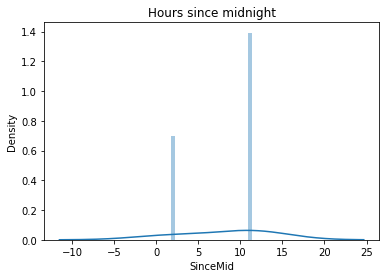

In [63]:
import seaborn as sns
sns.distplot(emails["SinceMid"],bins=20)
plt.title("Hours since midnight")